# Visulization of iterative rule-generating pipeline accomplished by GPT

In [ ]:
import os

from langgraph.graph import END, StateGraph, START

from agent.state import AgentState,BaseMessage
from agent.edges import good_rules_advisor,good_rules_commenter,matrix_generate_error,judge_matrix_checker,judge_manager_loo,split_1_out,ML_calc_exception
from agent.rule_LLM import Rule_Generator_o1,Rule_Commenter_o1,Rule_Advisor_o1
from agent.rule2matrix import Coded_Matrix_Generator_o1,Coded_Matrix_Checker_o1
from agent.rule_metric import Metric_Calculator,Metric_Commenter_o1
from agent.ML_metric import ML_Calculator,ML_Commenter_o1
from agent.manager import Manager_loo_o1


from dotenv import load_dotenv

load_dotenv('GPT_agent.env')

os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = os.getenv('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "GPT Agent O1"

# target_name = 'yield'
target_name = "Fe/Hf"
GPT_model = 'o1-preview-2024-09-12'
output_folder = 'Fe_Hf_o1_1110'
# output_folder = 'yield_o1'

graph_builder = StateGraph(AgentState)
graph_builder.add_node("rule generator", Rule_Generator_o1)
graph_builder.add_node("rule commenter", Rule_Commenter_o1)
graph_builder.add_node("rule advisor", Rule_Advisor_o1)
graph_builder.add_node("matrix generator", Coded_Matrix_Generator_o1)
graph_builder.add_node("matrix checker", Coded_Matrix_Checker_o1)
graph_builder.add_node("metric calculator", Metric_Calculator)
graph_builder.add_node("metric commenter", Metric_Commenter_o1)
graph_builder.add_node("ML calculator", ML_Calculator)
graph_builder.add_node("ML commenter", ML_Commenter_o1)
graph_builder.add_node("project manager", Manager_loo_o1)
graph_builder.add_node("one output",split_1_out)

graph_builder.add_edge(START, "rule generator")
graph_builder.add_edge("rule generator", "rule commenter")
graph_builder.add_conditional_edges("rule commenter",good_rules_commenter,{'matrix generator':'matrix generator','rule advisor':'rule advisor'},)
graph_builder.add_conditional_edges("rule advisor",good_rules_advisor,{'matrix generator':'matrix generator','rule generator':'rule generator'},)
graph_builder.add_conditional_edges("matrix generator",matrix_generate_error,{'matrix checker':'matrix checker','rule advisor':'rule advisor'},)
graph_builder.add_conditional_edges("matrix checker",judge_matrix_checker,{'matrix generator':'matrix generator','metric calculator':'metric calculator'},)
graph_builder.add_edge("metric calculator", "metric commenter")
graph_builder.add_edge("metric commenter", "ML calculator")
graph_builder.add_conditional_edges("ML calculator",ML_calc_exception,{'rule advisor':'rule advisor',"ML commenter":"ML commenter"},)
graph_builder.add_edge("ML commenter", "project manager")
graph_builder.add_conditional_edges("project manager",judge_manager_loo,{"one output":"one output",'rule advisor':'rule advisor'},)
graph_builder.add_edge("one output",END)
graph = graph_builder.compile()


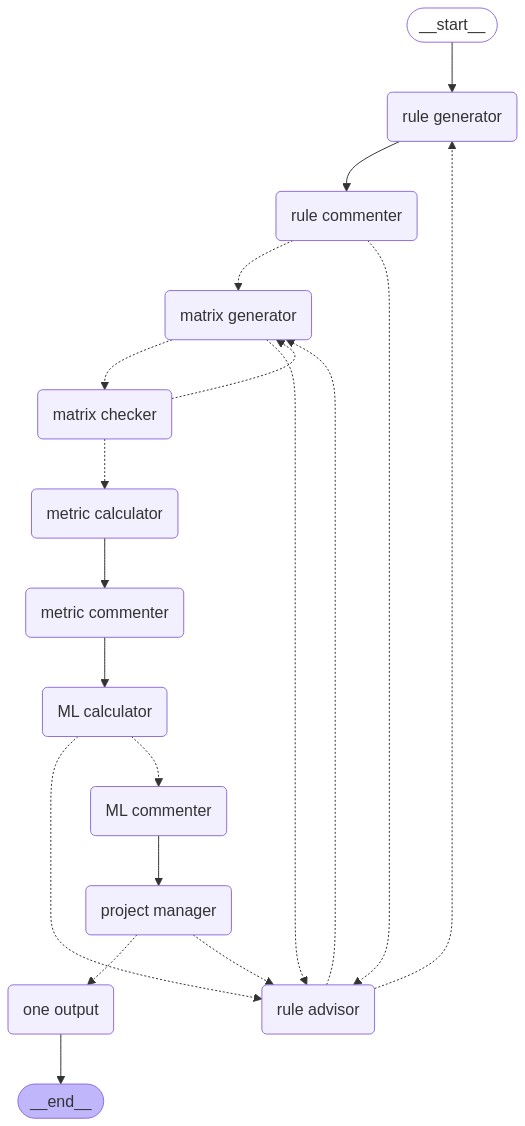

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)
    # This requires some extra dependencies and is optional
    pass